# EDA Notebook

The purpose of this notebook is to do exploratory data analysis with our fully cleaned dataset data_cleaned_final.csv.

### Risk index/safety index/metric ideation

- (fatalities + major injuries + minor injuries) / total passengers
- mean of the above numbers for every make and model
- risk index number with weights for fatal_fraction, serious_fraction, minor_fraction

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv('data_cleaned_final.csv')

In [12]:
# Reorder columns
df = df.reindex(columns=['Date', 'Year', 'Month', 'Location', 'Country', 'Injury_Severity', 'Damage_Type', 'Aircraft_Category', 'Make', 'Model', 'Engines', 'Engine_Type', 'Fatal_Injuries', 'Serious_Injuries', 'Minor_Injuries', 'Uninjured', 'Total_Passengers', 'Weather'])

In [13]:
# Creating columns for the fraction of each injury type relative to total passengers
df['Fatal_Injuries_Fraction'] = df['Fatal_Injuries'] / df['Total_Passengers']
df['Serious_Injuries_Fraction'] = df['Serious_Injuries'] / df['Total_Passengers']
df['Minor_Injuries_Fraction'] = df['Minor_Injuries'] / df['Total_Passengers']
df['Uninjured_Fraction'] = df['Uninjured'] / df['Total_Passengers']

In [14]:
w1 = 0.6 # Fatal injuries are weighted heaviest
w2 = 0.3 # Serious injuries are weighted less than fatal injuries
w3 = 0.1 # Minor injuries are weighted the least

df['Risk_Index'] = (w1 * df['Fatal_Injuries_Fraction']) + (w2 * df['Serious_Injuries_Fraction']) + (w3 * df['Minor_Injuries_Fraction'])

In [15]:
sizewise = [
    df['Total_Passengers'] < 100,
    (df['Total_Passengers'] >= 100) & (df['Total_Passengers'] <= 249),
    df['Total_Passengers'] >= 250
]

choices = ['Small', 'Medium', 'Large']

df['Plane_Size'] = np.select(sizewise, choices, default='unknown')


In [16]:
df['Make_and_Model'] = df['Make'] + ' ' + df['Model']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [18]:
# Creating Mean Risk Index for each plane model
model_mean_risk_index = df.groupby('Make_and_Model')['Risk_Index'].mean()
# Add column mean_risk_index to df
df = df.join(model_mean_risk_index, on='Make_and_Model', rsuffix='_mean')

In [19]:
# Total number of accidents for each model
model_total_accidents = df['Make_and_Model'].value_counts()
# Add column model_total_accidents to df
df = df.join(model_total_accidents, on='Make_and_Model', rsuffix='_total')

In [20]:
# Finding the safest planes
df_safe_planes = df.loc[(df['Risk_Index_mean'] == 0) & (df['Damage_Type'] == 'Minor')]

In [21]:
df_safe_planes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 790 to 36770
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       34 non-null     object 
 1   Year                       34 non-null     int64  
 2   Month                      34 non-null     int64  
 3   Location                   34 non-null     object 
 4   Country                    34 non-null     object 
 5   Injury_Severity            34 non-null     object 
 6   Damage_Type                34 non-null     object 
 7   Aircraft_Category          34 non-null     object 
 8   Make                       34 non-null     object 
 9   Model                      34 non-null     object 
 10  Engines                    34 non-null     float64
 11  Engine_Type                33 non-null     object 
 12  Fatal_Injuries             34 non-null     float64
 13  Serious_Injuries           34 non-null     float64
 

In [146]:
df_safe_planes['Plane_Size'].value_counts()

Plane_Size
Small     17
Medium     8
Large      8
Name: count, dtype: int64

In [48]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small']

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Uninjured,Total_Passengers,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size,Risk_Index_mean
800,1990-06-17,1990,6,"TAKU, AK",United States,Non-Fatal,Minor,Airplane,cessna,206U,...,10.0,10.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
1631,1990-10-29,1990,10,"COLUMBUS, OH",United States,Non-Fatal,Minor,Airplane,mcdonnell douglas,DC 9 31,...,49.0,49.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
3440,1991-10-24,1991,10,"DAYTONA BEACH, FL",United States,Non-Fatal,Minor,Airplane,piper,PA 28 R 180,...,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
6293,1993-07-28,1993,7,"FOND DU LAC, WI",United States,Non-Fatal,Minor,Airplane,north american,F 51,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
7902,1994-07-31,1994,7,"READINGTON, NJ",United States,Non-Fatal,Minor,Airplane,boeing,PT 13,...,4.0,4.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
9447,1995-07-28,1995,7,"DALLAS, TX",United States,Non-Fatal,Minor,Airplane,boeing,737 3A4,...,99.0,99.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
9475,1995-08-01,1995,8,"GLENDALE, AZ",United States,Non-Fatal,Minor,Airplane,north american,AT 6B,...,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
10305,1996-02-20,1996,2,"FAIRBANKS, AK",United States,Non-Fatal,Minor,Airplane,boeing,757 232,...,91.0,91.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
10424,1996-03-23,1996,3,"NASHVILLE, TN",United States,Non-Fatal,Minor,Airplane,piper,PA 28 201,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0
15871,1999-10-17,1999,10,"JEAN, NV",United States,Non-Fatal,Minor,Airplane,waco,UPF7,...,5.0,5.0,VMC,0.0,0.0,0.0,1.0,0.0,Small,0.0


In [49]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small']['Make'].value_counts()

Make
boeing               6
piper                3
cessna               2
north american       2
waco                 2
mcdonnell douglas    1
gulfstream           1
Name: count, dtype: int64

In [33]:
df_safe_planes.loc[df_safe_planes['Plane_Size'] == 'Small'][100:]

,Date,Year,Month,Location,Country,Injury_Severity,Damage_Type,Aircraft_Category,Make,Model,...,Minor_Injuries,Uninjured,Total_Passengers,Weather,Fatal_Injuries_Fraction,Serious_Injuries_Fraction,Minor_Injuries_Fraction,Uninjured_Fraction,Risk_Index,Plane_Size
32382,2015-11-15,2015,11,"Greeley, CO",United States,Non-Fatal,Minor,Airplane,piper,J3C,...,0.0,2.0,2.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
32500,2016-02-03,2016,2,"San Diego, CA",United States,Non-Fatal,Minor,Airplane,cessna,172S,...,0.0,4.0,4.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
32961,2016-08-13,2016,8,"Fort Lauderdale, FL",United States,Non-Fatal,Minor,Airplane,piper,PA 34,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
33510,2017-06-08,2017,6,"Harrisonville, MO",United States,Non-Fatal,Minor,Airplane,piper,PA 28 235,...,0.0,1.0,1.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
33606,2017-07-08,2017,7,"San Jose, CA",United States,Non-Fatal,Minor,Airplane,cessna,R182,...,0.0,7.0,7.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
34869,2019-03-21,2019,3,"Hollywood, FL",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35186,2019-07-27,2019,7,"Gaithersburg, MD",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35390,2019-10-22,2019,10,"Lamesa, TX",United States,Non-Fatal,Minor,Airplane,air tractor,AT 502,...,0.0,1.0,1.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35407,2019-10-31,2019,10,"Honolulu, HI",United States,Non-Fatal,Minor,Airplane,cessna,208,...,0.0,3.0,3.0,VMC,0.0,0.0,0.0,1.0,0.0,Small
35492,2020-01-08,2020,1,"Palm Coast, FL",United States,Non-Fatal,Minor,Airplane,cessna,172,...,0.0,2.0,2.0,VMC,0.0,0.0,0.0,1.0,0.0,Small


In [22]:
df.rename(columns={'Risk_Index_mean': 'Mean_Risk_Index', 'count': 'Model_Total_Accidents'}, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37461 entries, 0 to 37460
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       37461 non-null  object 
 1   Year                       37461 non-null  int64  
 2   Month                      37461 non-null  int64  
 3   Location                   37459 non-null  object 
 4   Country                    37461 non-null  object 
 5   Injury_Severity            37461 non-null  object 
 6   Damage_Type                37461 non-null  object 
 7   Aircraft_Category          37461 non-null  object 
 8   Make                       37461 non-null  object 
 9   Model                      37461 non-null  object 
 10  Engines                    37461 non-null  float64
 11  Engine_Type                36420 non-null  object 
 12  Fatal_Injuries             37461 non-null  float64
 13  Serious_Injuries           37461 non-null  flo

In [132]:
# Making a separate table to drill down into the safest planes question
df_make_model = df.groupby(['Make', 'Model'])[['Mean_Risk_Index', 'Model_Total_Accidents']].mean()

In [133]:
# Make Plane_Size column in df_make_model by mapping the Plane_Size column from df
df_make_model = df_make_model.join(df.groupby(['Make', 'Model'])['Plane_Size'].first())


In [134]:
# Save df_make_model as csv for top 10 safest planes filtering
df_make_model.to_csv('make_model_risk.csv')

---

In [175]:
# Actual final cleaned dataset
df.to_csv('data_cleaned_final.csv', index=False)

## Top 10 analysis

In [25]:
df_safest = pd.read_csv('make_model_risk.csv')
df_safest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2606 entries, 0 to 2605
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make                   2606 non-null   object 
 1   Model                  2606 non-null   object 
 2   Mean_Risk_Index        2606 non-null   float64
 3   Model_Total_Accidents  2606 non-null   float64
 4   Plane_Size             2606 non-null   object 
dtypes: float64(2), object(3)
memory usage: 101.9+ KB


In [26]:
# Shrinking the dataset down to airplanes with more than 100 entries
df_safest = df_safest.loc[df_safest['Model_Total_Accidents'] > 100]

In [27]:
# Sort df_safest by Mean_Risk_Index in ascending order
df_safest = df_safest.sort_values('Mean_Risk_Index', ascending=True)

In [28]:
# Checking how many planes are left
df_safest['Plane_Size'].value_counts()

Plane_Size
Small    79
Name: count, dtype: int64

In [29]:
# 79 is a good amount! 
df_safest['Make_and_Model'] = df_safest['Make'] + ' ' + df_safest['Model']
df_safest[:10]

,Make,Model,Mean_Risk_Index,Model_Total_Accidents,Plane_Size,Make_and_Model
1032,cessna,185,0.053330,167.0,Small,cessna 185
985,cessna,180,0.053436,438.0,Small,cessna 180
2132,piper,PA 22,0.053941,129.0,Small,piper PA 22
934,cessna,170B,0.066126,265.0,Small,cessna 170B
967,cessna,172R,0.068582,161.0,Small,cessna 172R
931,cessna,170,0.068819,120.0,Small,cessna 170
1614,grumman,G 164A,0.072200,247.0,Small,grumman G 164A
2106,piper,PA 18,0.075128,390.0,Small,piper PA 18
899,cessna,120,0.079825,114.0,Small,cessna 120
900,cessna,140,0.083156,282.0,Small,cessna 140


In [30]:
# Filtering df by the ten safest planes
top_ten = df_safest[:10]['Make_and_Model'].tolist()

filtered_df = df[df['Make_and_Model'].isin(top_ten)]

filtered_df.sort_values(by='Mean_Risk_Index', ascending=True, inplace=True)

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_77230/298547245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='Mean_Risk_Index', ascending=True, inplace=True)


/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_68810/4257552955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Make_and_Model', y='Risk_Index', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='mako_r')


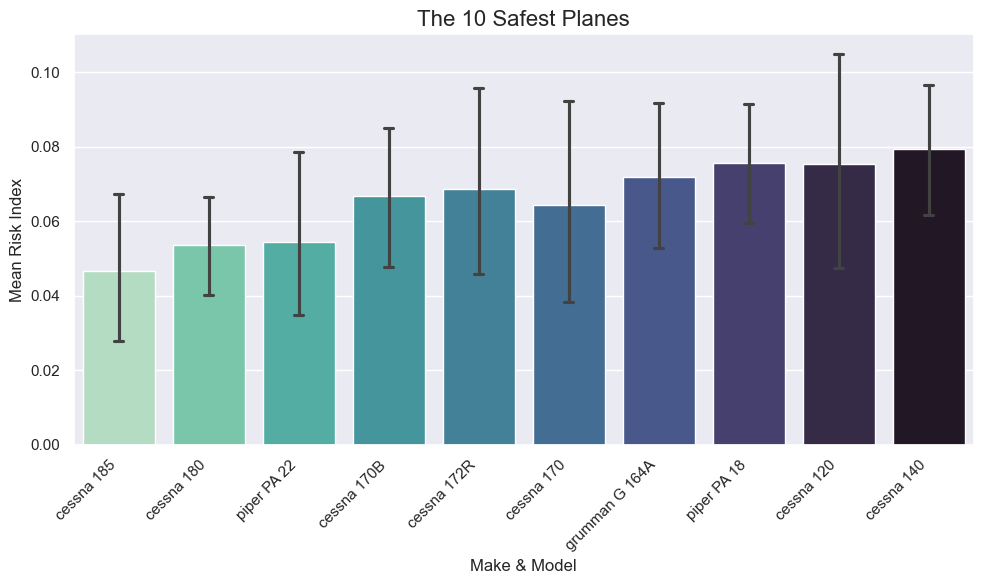

In [100]:
# Plotting the mean risk index for the ten safest planes
plt.figure(figsize=(10, 6))
sns.barplot(x='Make_and_Model', y='Risk_Index', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='mako_r')
plt.xlabel('Make & Model', fontsize=12)
plt.ylabel('Mean Risk Index', fontsize=12)
plt.title('The 10 Safest Planes', fontsize=16)

plt.xticks(rotation=45, ha='right')
sns.set(style="darkgrid")

plt.tight_layout()
plt.savefig('Images/mean_risk_index_safest_planes.png')
plt.show()



/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_77230/1224583306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Make_and_Model', y='Fatal_Injuries_Fraction', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='rocket_r')


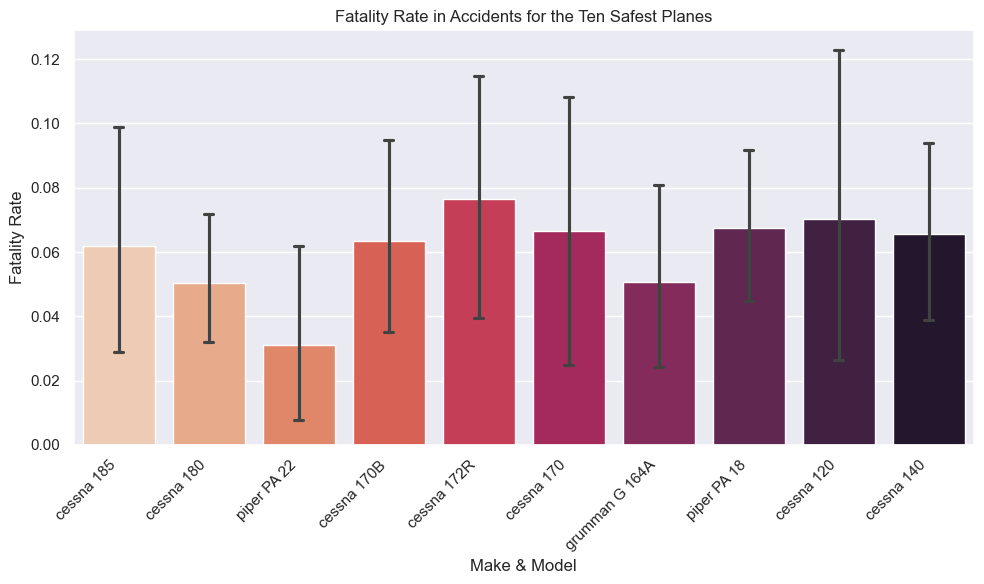

In [35]:
# Fatality rate of the ten safest planes
plt.figure(figsize=(10, 6))
sns.barplot(x='Make_and_Model', y='Fatal_Injuries_Fraction', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='rocket_r')

plt.xticks(rotation=45, ha='right')
sns.set(style="darkgrid")

plt.xlabel('Make & Model')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate in Accidents for the Ten Safest Planes')

plt.tight_layout()
plt.savefig('Images/fatality_rate_safest_planes.png')

plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_77230/2973814646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Make_and_Model', y='Serious_Injuries_Fraction', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='viridis')


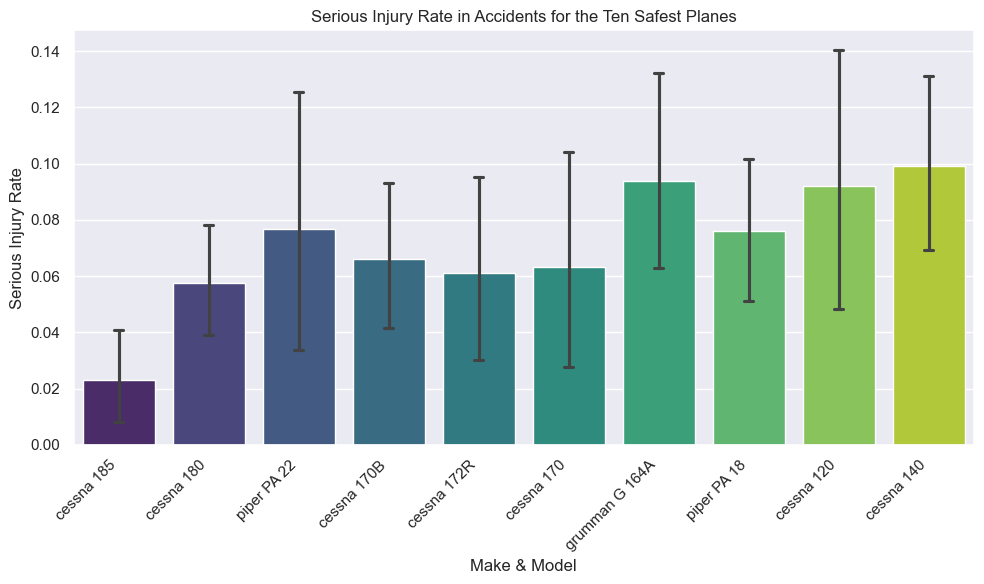

In [36]:
# Serious injury rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Make_and_Model', y='Serious_Injuries_Fraction', data=filtered_df, errorbar=('ci', 95), capsize=0.1, palette='viridis')

plt.xticks(rotation=45, ha='right')
sns.set(style="darkgrid")

plt.xlabel('Make & Model')
plt.ylabel('Serious Injury Rate')
plt.title('Serious Injury Rate in Accidents for the Ten Safest Planes')
plt.tight_layout()
plt.savefig('Images/serious_injury_rate_safest_planes.png')

plt.show()



## Bottom 10 in mean risk index

In [37]:
bottom_ten = df_safest[-10:]['Make_and_Model'].tolist()

In [38]:
another_df = df[df['Make_and_Model'].isin(bottom_ten)]

In [39]:
another_df.sort_values(by='Mean_Risk_Index', ascending=False, inplace=True)

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_77230/448366244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  another_df.sort_values(by='Mean_Risk_Index', ascending=False, inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'beechcraft 58'),
  Text(1, 0, 'piper PA 23 250'),
  Text(2, 0, 'piper PA 32R 300'),
  Text(3, 0, 'beechcraft A36'),
  Text(4, 0, 'cessna P210N'),
  Text(5, 0, 'cirrus SR22'),
  Text(6, 0, 'mooney M20K'),
  Text(7, 0, 'cessna 208B'),
  Text(8, 0, 'piper PA 32 260'),
  Text(9, 0, 'piper PA 30')])

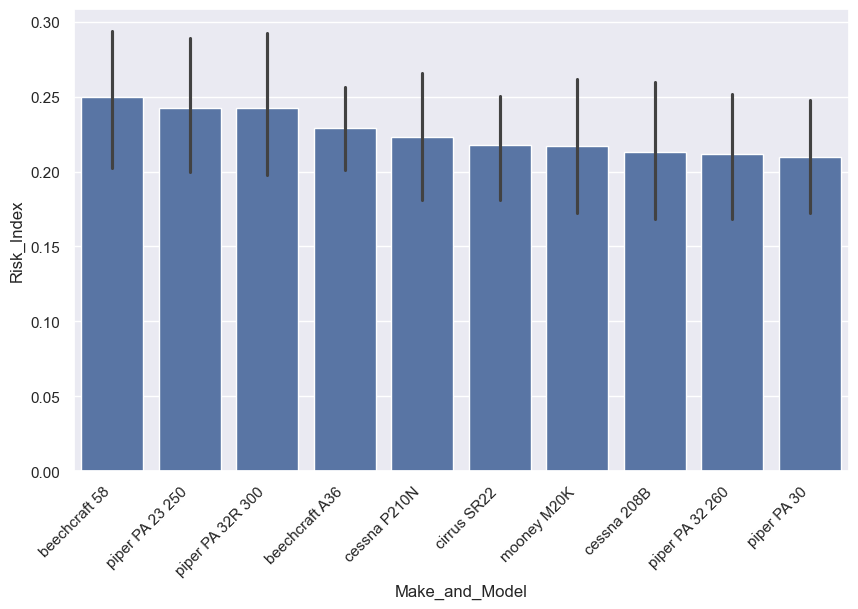

In [41]:
# Least safe 10 planes
plt.figure(figsize=(10, 6))
sns.barplot(x='Make_and_Model', y='Risk_Index', data=another_df)
plt.xticks(rotation=45, ha='right')

## Misc experimentation with visualizations

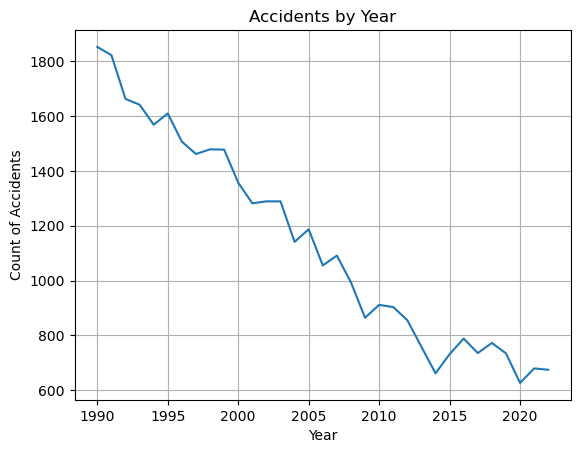

In [178]:
# Total accidents by year in our cleaned dataset
df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.title('Accidents by Year')
plt.grid()
plt.show()

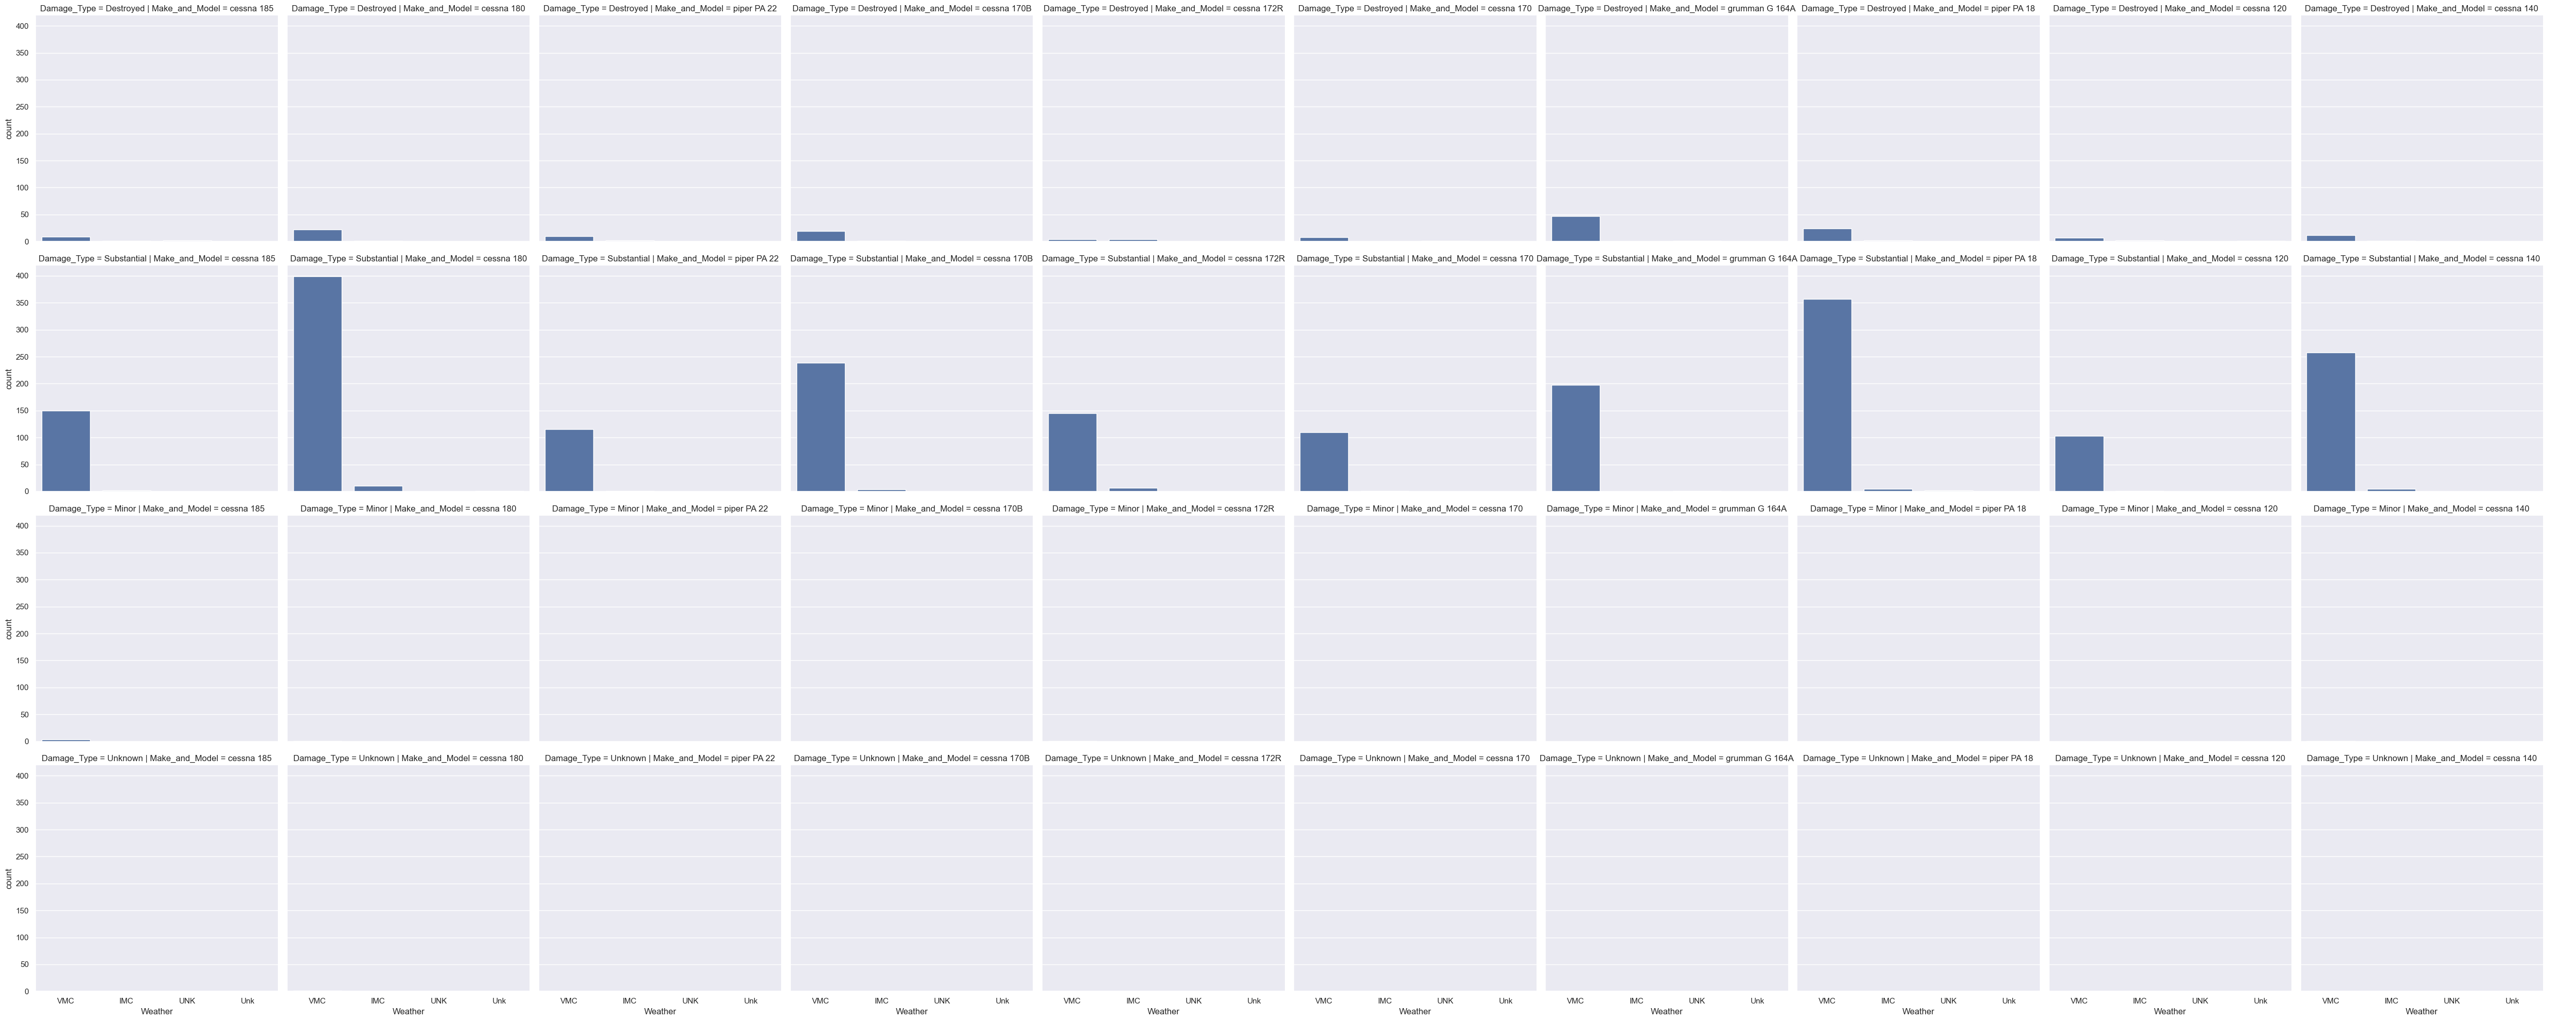

In [49]:
# Did not have enough time to figure out a sensible plot or this was never going to work in the first place

sns.catplot(x = 'Weather', kind = 'count', col = 'Make_and_Model', row = 'Damage_Type', data = filtered_df)
plt.show()

#### Testing out stuff with weather

In [51]:
filtered_df.dropna(subset=['Weather'], inplace=True)

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_68810/739268105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Weather'], inplace=True)


In [86]:
df.dropna(subset=['Weather'], inplace=True)
df.drop(df[df['Weather'] == 'UNK'].index, inplace=True)
df.drop(df[df['Weather'] == 'Unk'].index, inplace=True)

In [59]:
filtered_df['Weather'].value_counts()
filtered_df.drop(filtered_df[filtered_df['Weather'] == 'UNK'].index, inplace=True)
filtered_df.drop(filtered_df[filtered_df['Weather'] == 'Unk'].index, inplace=True)


/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_68810/38875960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[filtered_df['Weather'] == 'UNK'].index, inplace=True)
/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_68810/38875960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[filtered_df['Weather'] == 'Unk'].index, inplace=True)


In [71]:
filtered_df['Weather'].value_counts()


Weather
VMC    2243
IMC      50
Name: count, dtype: int64

In [72]:
df_subset = filtered_df[['Weather', 'Make_and_Model', 'Fatal_Injuries_Fraction', 'Serious_Injuries_Fraction', 'Minor_Injuries_Fraction', 'Risk_Index']]
grouped_df = df_subset.groupby(['Weather', 'Make_and_Model']).mean()

In [73]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19 entries, ('IMC', 'cessna 120') to ('VMC', 'piper PA 22')
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fatal_Injuries_Fraction    19 non-null     float64
 1   Serious_Injuries_Fraction  19 non-null     float64
 2   Minor_Injuries_Fraction    19 non-null     float64
 3   Risk_Index                 19 non-null     float64
dtypes: float64(4)
memory usage: 845.0+ bytes


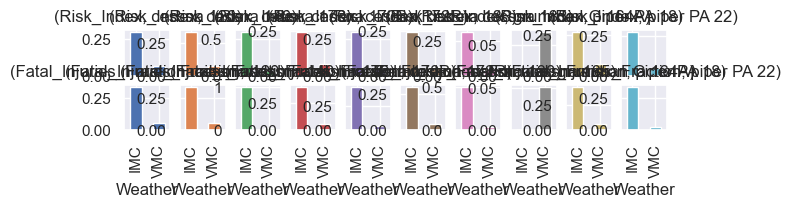

In [79]:
# Another case where we did not commit enough time to experimenting with the plot. Might be that this was not going to work but maybe it could have.

grouped_df[['Risk_Index', 'Fatal_Injuries_Fraction']].unstack().plot.bar(subplots=True, layout = (10,10), figsize = (7,7),
                                                         legend = False, sharex = True)

plt.show()

#### A simple plot to show correlation between our risk index vs fatality rate

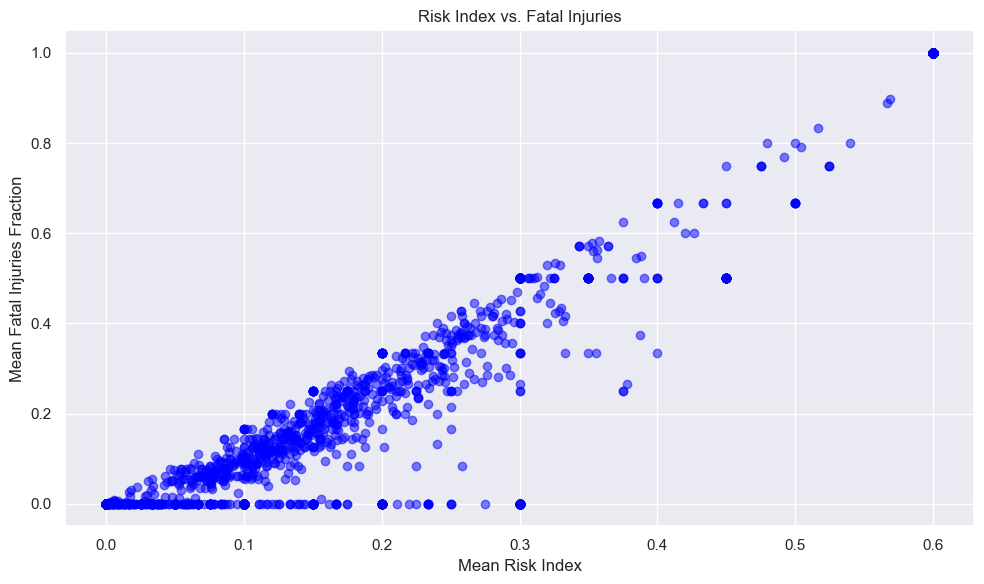

In [95]:
# Group by Make_and_Model to get average Risk Index and severity (Fatal Injuries Fraction)
risk_vs_severity = df.groupby('Make_and_Model').agg({
    'Risk_Index': 'mean',
    'Fatal_Injuries_Fraction': 'mean'
})

# Plot as a scatter plot with Risk Index vs. Fatal Injuries
plt.figure(figsize=(10, 6))
plt.scatter(risk_vs_severity['Risk_Index'], risk_vs_severity['Fatal_Injuries_Fraction'], alpha=0.5, color='blue')

plt.title('Risk Index vs. Fatal Injuries')
plt.xlabel('Mean Risk Index')
plt.ylabel('Mean Fatal Injuries Fraction')
plt.tight_layout()
plt.show()